<a href="https://colab.research.google.com/github/manujsinghwal/applied-statistics-in-python/blob/main/2.%20data-vizualization/the_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogram

A **histogram** is a type of bar chart that shows the distribution of numerical data. It represents data by grouping numbers into ranges (called **bins** or **classes**) and showing how many data points fall into each range.
* Each bar in a histogram represents a range (or class).
* The height of each bar shows how many data points (or occurrences) fall within that range.

\
**How to decide bins?**
\
**E.g.** Refer to the dataset below, the numbers of calls per day made from a cell phone for the past 30 days.
\
$[4, 5, 1, 0, 7, 8, 3, 6, 8, 3, 0, 9, 2, 12, 14, 5, 5, 10, 7, 2, 11, 9, 4, 3, 1, 5, 7, 3, 5, 6]$

\
One option is the $ 2^k >= n $ rule to determine the number of classes, where $k$ equals the number of classes and $n$ equals the number of data points.
\
\
Given $n = 30$, the best value for $k$ is 5. How?
\
$ 2^k >= n $
\
$ 2^k >= 30 $
\
$ 2^5 >= 30 $
\
$ 32 >= 30 $
\
\
Calculate the width $W$ of each class.
\
\
$ W = \frac{Largest\:value - Smallest\:value}{Number\:of\:classes}\ $
\
$ W = \frac{14 - 0}{5}\ $
\
$ W = 2.8 ≈	3 $

In [20]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Generating dataset
calls_per_day = [4, 5, 1, 0, 7, 8, 3, 6, 8, 3, 0, 9, 2, 12, 14, 5, 5, 10, 7, 2, 11, 9, 4, 3, 1, 5, 7, 3, 5, 6]

# Creating a pandas DataFrame
df1 = pd.DataFrame(
    calls_per_day,
    columns=['CallsPerDay']
    )

# Shows top 5 records only
df1.head()

,CallsPerDay
0,4
1,5
2,1
3,0
4,7


In [27]:
# Best number of classes based on the rule 2^k >= n (since 2^5 >= 30)
k = 5
min_value = df1['CallsPerDay'].min()
max_value = df1['CallsPerDay'].max()

# Classes width (rounded up to the next whole number)
w = np.ceil((max_value - min_value)/k).astype(int)
w

3

In [30]:
# Creating the bins
bins = np.arange(min_value, max_value+w, w)
bins

array([ 0,  3,  6,  9, 12, 15])

In [31]:
# Setting up some customizations
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid') # Setting the background theme

<Figure size 1000x600 with 0 Axes>

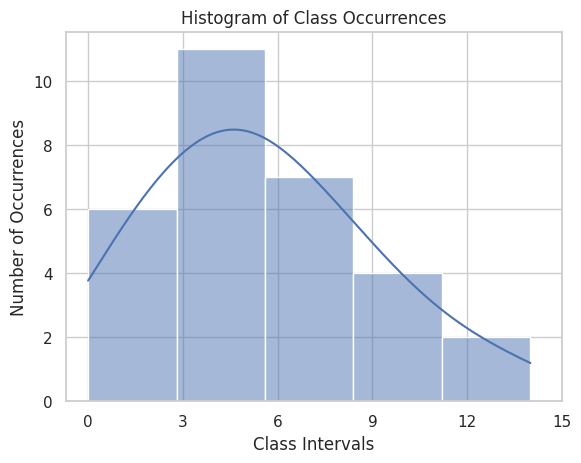

In [48]:
# Plotting the histogram
sns.histplot(data=df1, x='CallsPerDay', bins=bins, binwidth=w)

# Set x-axis ticks to match the bin edges
plt.xticks(bins)
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

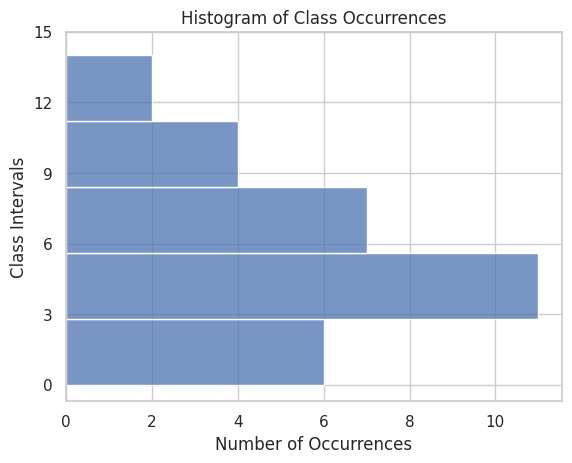

In [45]:
# Plotting the histogram
sns.histplot(data=df1, y='CallsPerDay', bins=bins, binwidth=w)

# Set x-axis ticks to match the bin edges
plt.yticks(bins)
plt.ylabel("Class Intervals")
plt.xlabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()